In [1]:
import numpy as np
from math import sqrt
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt

Welcome to your projectile motion challenge problem! Here you'll write code that will plot the trajectory of a projectile in ideal conditions, with the standard assumptions of no air resistance and constant gravitational acceleration. You'll use the path-length function you created earlier to compare the total distance traveled in the air by the projectile for different launch angles and launch velocities.

We'll track the projectile's position using an $xy$ coordinate system. It is launched from position (0,0) with launch angle $\theta$ above the positive $x$ axis, launch speed $v_0$, and gravitational acceleration $g$ in the $-y$ direction. We'll use a time coordinate $t$ to specify the time since launch.

First, in the cell below, **write functions that return x position and y position when passed values of $t$, $v_0$, $\theta$, and $g$**. Assume the angle is passed in units of radians. 

*Hint*: You can treat the x and y directions separately. For example, the equation of motion for the x-coordinate is 

$$x = v_{0x} t$$

where $v_{0x}$ is the x-component of initial velocity vector. How do you compute $v_{0x}$ given $v_0$ and $\theta$?

In [2]:
#Helper function
def projection(t, v0, g):
    return v0*t - 0.5*g*(t**2)

def projectile_X(t, v0, theta, g):
    vx0 = v0*np.cos(theta)
    return projection(t, vx0, 0)

def projectile_Y(t,v0, theta, g):
    vy0 = v0*np.sin(theta)
    return projection(t, vy0, g)

**Now write a function that returns the total time the projectile will stay in the air** (which means return to $y = 0$), in units of seconds, given $v_0$ (with units m /s), $\theta$ (in radians) , and $g$ (with units m / s$^2$). 

*Hint*: the equation of motion along y-direction is 

$$y = v_{0y}t - \frac{1}{2}gt^2$$

When $y = 0$, $t$ either equals $0$, or

$$t = t_f = \frac{2v_y}{g}$$

where $t_f$ represents the time the projectile will stay in the air.

In [3]:
def time_of_flight(v0,theta,g):
    vy = v0*np.sin(theta)
    return 2. * vy / g

In the cell below, **make a plot of a projectile trajectory** when $g$ = 9.8 m/$s^2$ in the -y direction, $v_0$ is 100 m/s, and $\theta$ is 45 degrees ($\pi$/4 radians). 

To do this, you might find the following steps helpful:

First, create an array of time values linearly spaced between 0 and $t_f$. You get to choose the number of time values. A reasonable choice might be 128, but you can see what happens if you use more or less than that.

You'll be recording the $x$ and $y$ positions of the particle at each time, so you'll need arrays for those, too.

Loop through the time values and determine the value of $x$ and $y$ at each time.

Then plot $y$ vs $x$.


$\textit{Recall}:$ $\theta_{radians} = \frac{\theta_{degree}\pi}{180}$

<IPython.core.display.Javascript object>


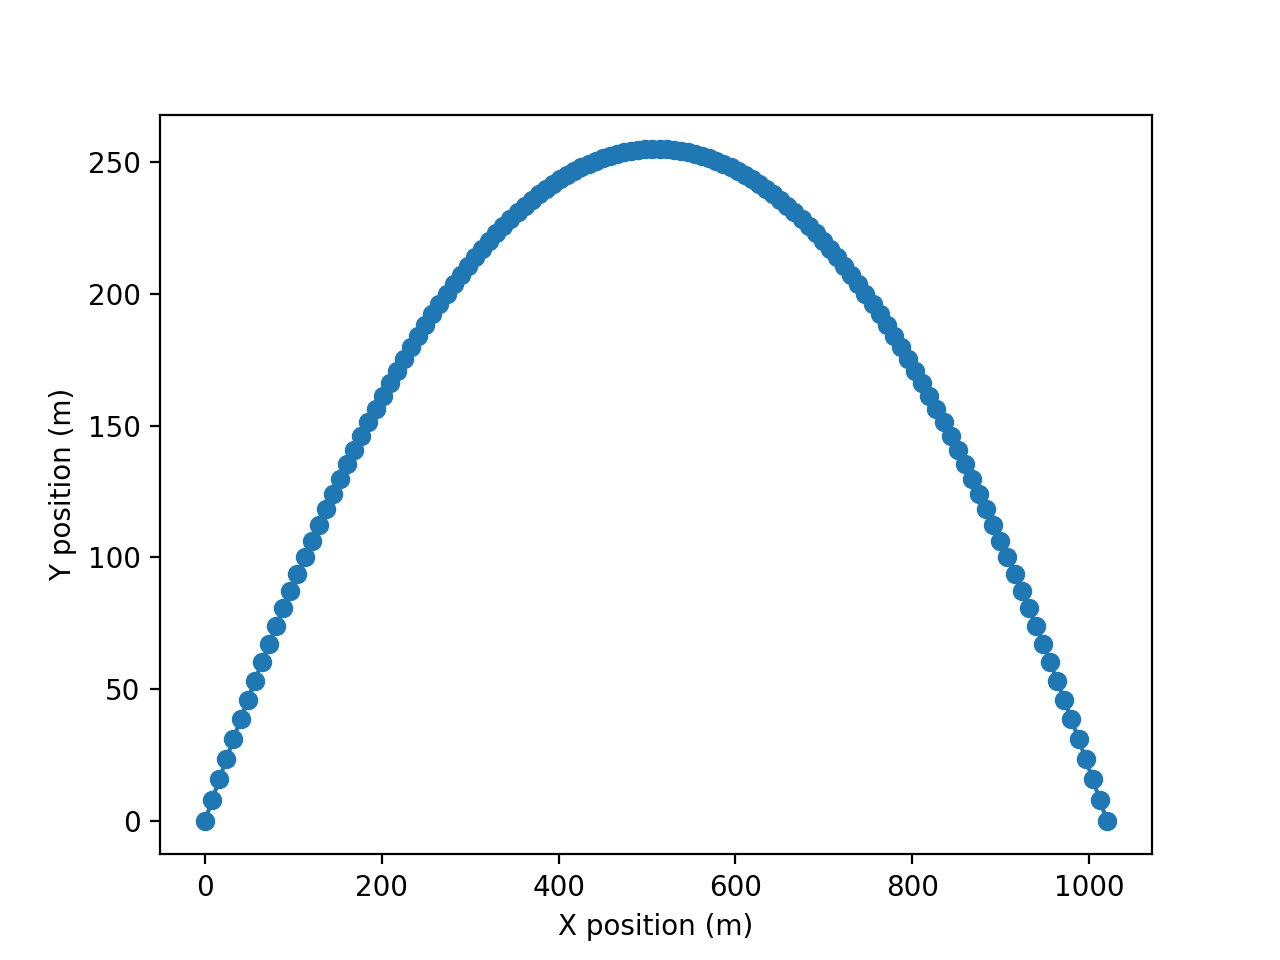

In [4]:
plt.close() # leave this here for the students, it makes sure that if they run this cell again, the plot appears below

# parameters    
theta = 45. * np.pi/180
g = 9.8
v0 = 100.
num_points = 128

# calculate the trajectory
tf = time_of_flight(v0,theta,g)

times = np.linspace(0,tf, num_points)
X = np.zeros(num_points)
Y = np.zeros(num_points)

for i in range(num_points):
    X[i] = projectile_X(times[i],v0,theta,g)
    Y[i] = projectile_Y(times[i],v0,theta,g)
    
    
#plot
plt.plot(X,Y,'-o')

# Always label your axes!
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")

Next, let's see what happens when we change the launch angle. **Make the same plot as above, but for several different values of the launch angle $\theta$, all displayed together in a single plot.** For example, you could use 9 angles linearly spaced between 5 and 85 degrees. Plot all the trajectories on the same graph in the cell below.

Once you've done that, **save the trajectory information for later.** In the same loop that you're using to make the plot, save the $x$ and $y$ values for each value of theta, using np.save(). Give them descriptive names that include the value of theta so that you can retrieve them later.



<IPython.core.display.Javascript object>


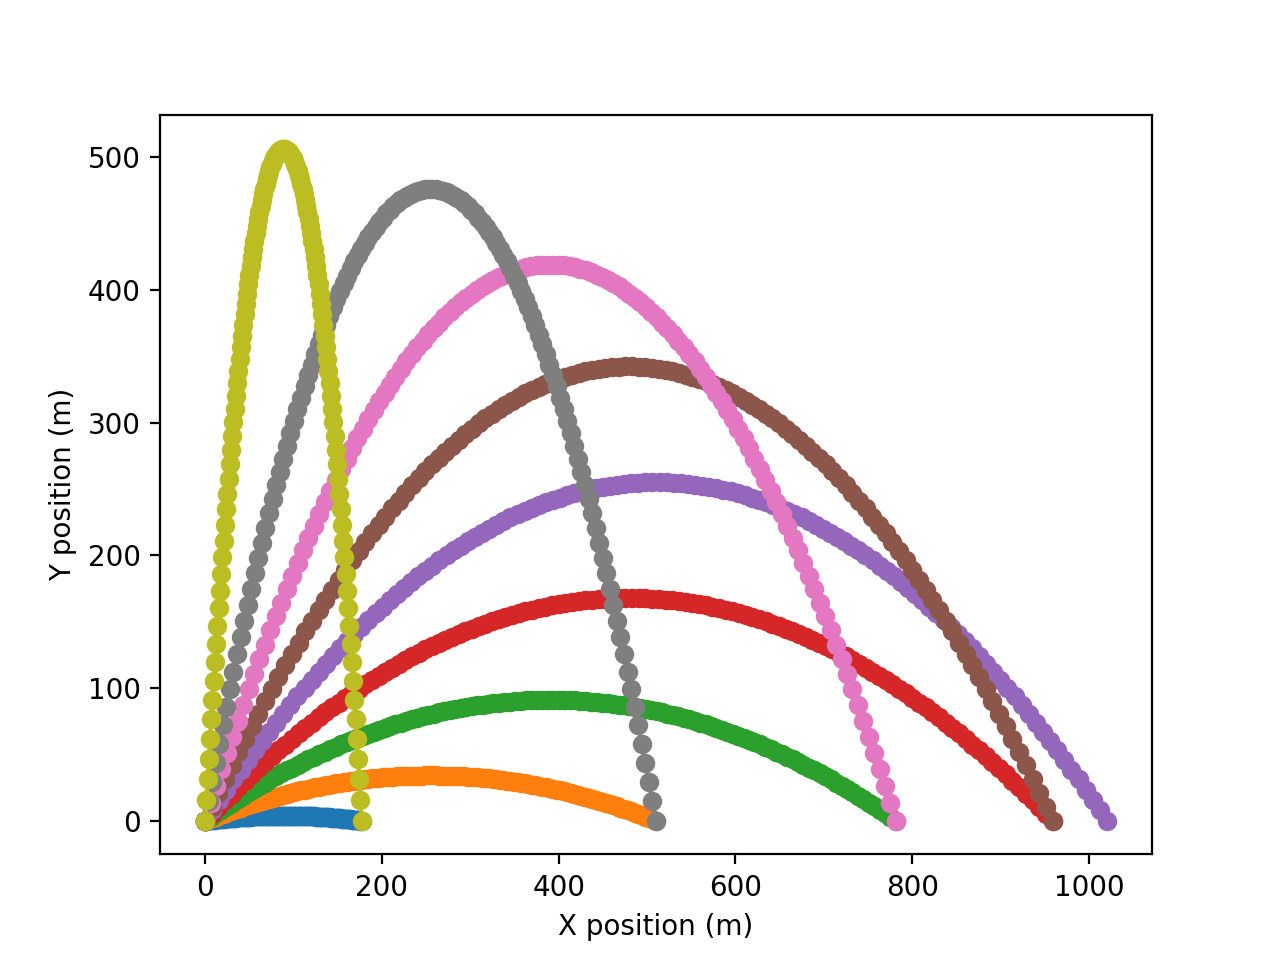

In [5]:
plt.close() # keep this here

num_angles = 9
min_angle = 5 # degrees
max_angle = 85 # degrees

thetas_degrees = np.linspace(min_angle,max_angle,num_angles)
thetas_radians = thetas_degrees * np.pi/180

for theta_index in range(num_angles):
    
    theta = thetas_radians[theta_index]
    
    tf = time_of_flight(v0,theta,g)
    
    
    times = np.linspace(0,tf, num_points)
    X = np.zeros(num_points)
    Y = np.zeros(num_points)

    for i in range(num_points):
        X[i] = projectile_X(times[i],v0,theta,g)
        Y[i] = projectile_Y(times[i],v0,theta,g)
        
    plt.plot(X,Y,'-o')
    np.save("X_launch_angle_" + str(thetas_degrees[theta_index]),X) 
    np.save("Y_launch_angle_" + str(thetas_degrees[theta_index]),Y) 
    
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")


Now we want to estimate the total distance traveled by the projectile in the air. You've already written a path-length function. **Rewrite the path-length function (and any helper functions) into the cell below.**

In [6]:
#Already made
def length(x, y):
    """Calculates the length of a vector (x,y) using the Pythagorean theorem."""
    return sqrt(x**2+y**2)

def pathLength(x_array,y_array):
    if len(x_array) != len(y_array):
        raise Exception("Vectors do not have the same length")
        
    n = len(x_array)
    i = 1
    L = 0
    while (i < n):
        L = L + length(x_array[i]-x_array[i-1],y_array[i]-y_array[i-1])
        i = i+1
    return L

Loop through the launch angles again, load the trajectories, and determine the total distance traveled in the air for each angle. **Plot these distances versus launch angle.** 

<IPython.core.display.Javascript object>


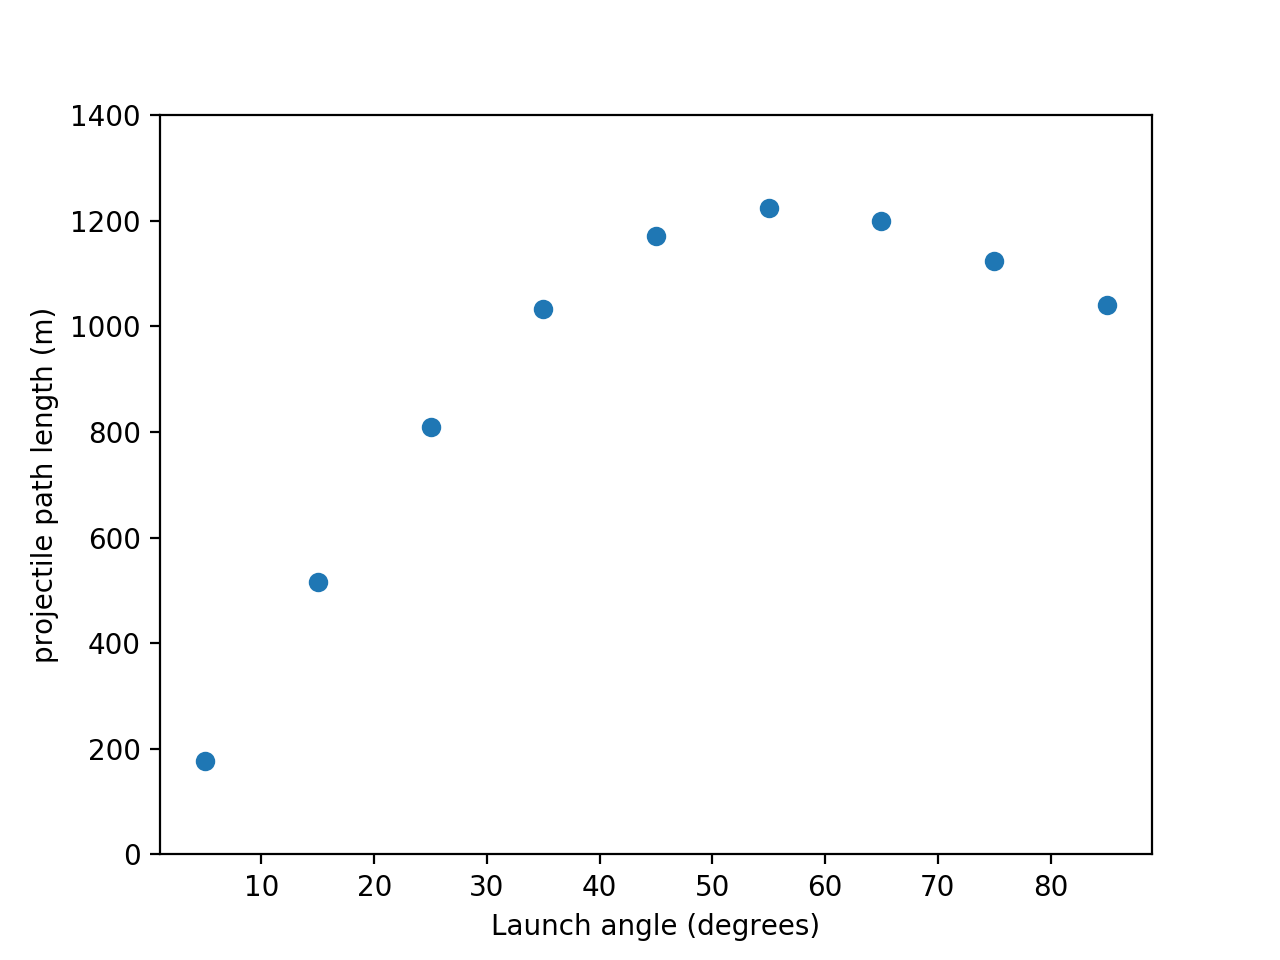

(0, 1400)

In [7]:
plt.close()

path_lengths = np.zeros(num_angles)
for theta_index in range(num_angles):
    X =  np.load("X_launch_angle_" + str(int(thetas_degrees[theta_index])) + str(".npy"))
    Y =  np.load("Y_launch_angle_" + str(int(thetas_degrees[theta_index])) + str(".npy"))
    
    pl = pathLength(X,Y)
    path_lengths[theta_index] = pl

plt.plot(thetas_degrees, path_lengths,'o')
plt.xlabel("Launch angle (degrees)")
plt.ylabel("projectile path length (m)")
plt.ylim(0,1400)

What is determining the shape of that curve you just made? How do you think this will change if you used different launch speeds or gravitational accelerations? Experiment! What other interesting relations can you find?